#### 실습3. FashionMNIST 신경망

In [20]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# 1.데이터 입출력
device = 'cuda' if torch.cuda.is_available() else 'cpu' # 그래픽 카드를 사용할 수 있으면 쓰고 아니면 cpu로 사용

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2.모델 입출력
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # 입력층
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256), # Layer 1
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64), # Layer 2
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10), # 출력층
        )

    def forward(self, x) :
        out = self.flatten(x)
        out = self.linear_relu_stack(out)
        return out
    
model = NeuralNetwork()
model.to(device) # GPU 적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
epochs = 10

def train_loop()
for epoch in range(epochs):
    print("Epoch: {epoch+1}----------------------------------------")
    size = len(train_dataloader.dataset)
    for batch, (x, y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(x)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss = loss.item()
            current = batch * len(x)
            print(f'loss: {loss: .4f}, [{current} / {size}]')
           
# 에폭을 한번씩 훈련 돌릴때마다 테스트를 한번씩 해줄것
test_size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
test_loss = 0
correct = 0
 
# 테스트 할때는 기울기 업데이트 안할거다
with torch.no_grad(): 
    for x,y in test_dataloader:
        x = x.to(device)
        y = y.to(device)
        output = model(x)
        test_loss += loss_fn(outputs, y).item()
        correct += (outputs.argmax(1) == y).type(torch.float).sum().item() # 무엇이 정답일까? : 출력된 10개의 점수 중에서 가장 큰 값과 예측한 값이 같으면

test_loss /= num_batches
correct /= test_size
print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


outputs = torch.tensor([[0.2, 2.1, 1.5, 0.4],   
                        [0.3, 1.2, 2.3, 0.1]])
answer = torch.tensor([1,3])
result = outputs.argmax(1) # [1,2]
print((result == answer).type(torch.int).sum().item())


Epoch: {epoch+1}----------------------------------------


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

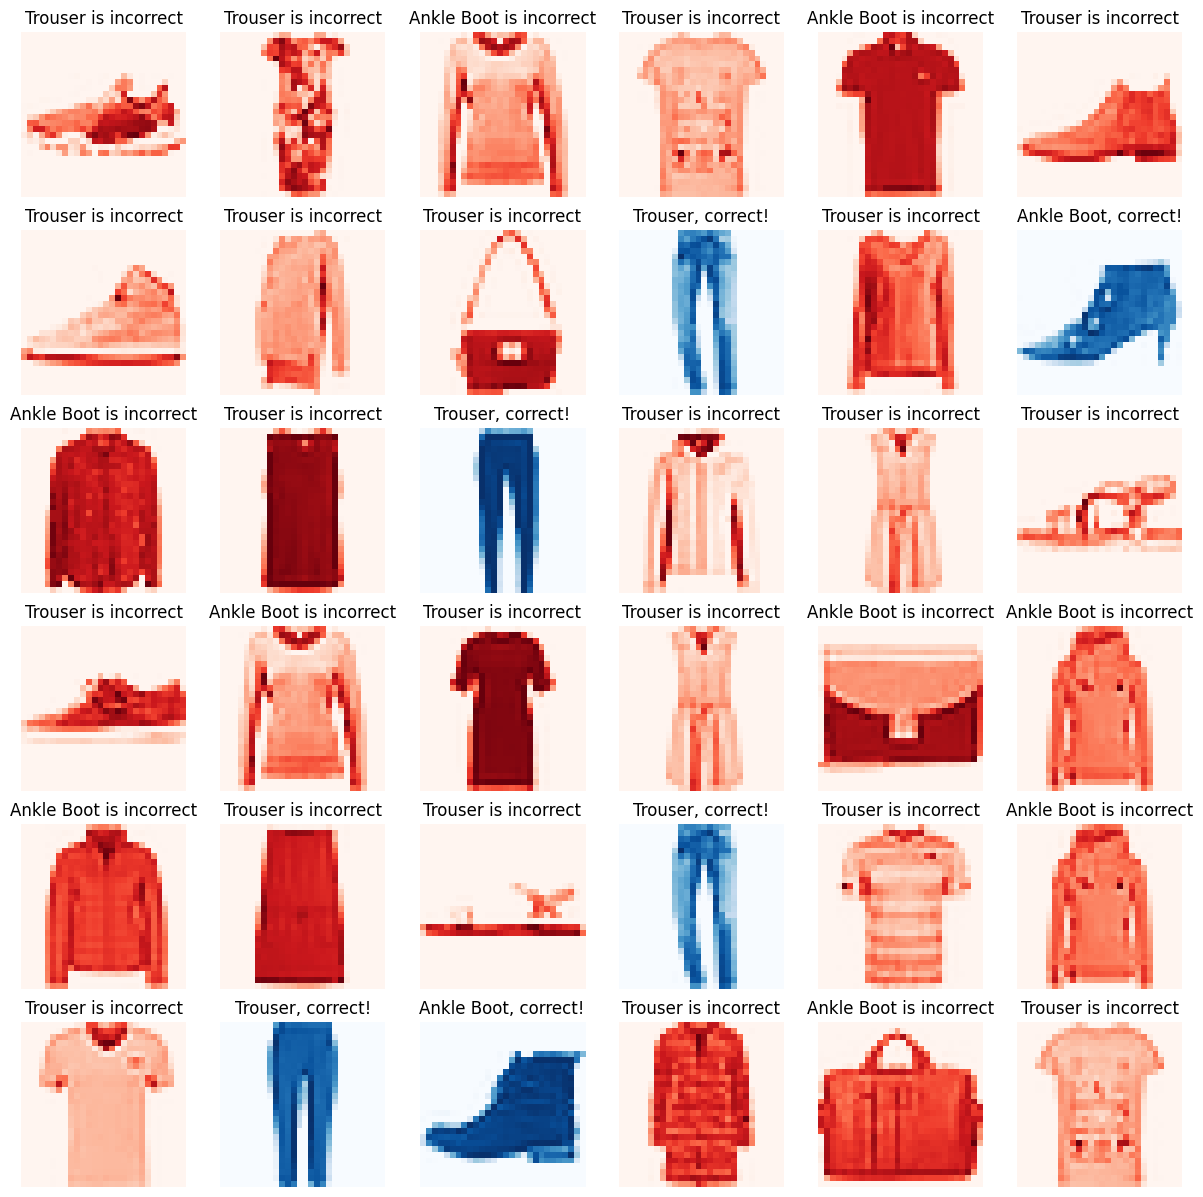

In [31]:
label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize = (15,15))
model.eval() # 모델을 평가모드로 변경

for i in range(1, columns * rows +1):
    data_idx = np.random.randint(len(test_dataloader))
    input_img = test_data[data_idx][0].to(device)
    label = test_data[data_idx][1]

    with torch.no_grad():
        output = model(input_img)
        _, prediction = torch.max(output, 1)
        pred_class = label_tags[prediction.item()]
        true_class = label_tags[label]

    title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
    cmap = "Blues" if pred_class == true_class else "Reds"

    fig.add_subplot(rows, columns, i)
    plot_img = input_img.squeeze().cpu().numpy()
    plt.imshow(plot_img, cmap = cmap)
    plt.title(title)
    plt.axis("off")

plt.show()



